# Annotating pathway into mouse Single-Cell clusters

This tutorial shows how to use the descartes_rpa module with scanpy formated data outside of Descartes. Data from the [Trajectory inference for hematopoiesis in mouse](https://scanpy-tutorials.readthedocs.io/en/latest/paga-paul15.html) tutorial will be used.

In [1]:
import scanpy as sc

In [2]:
adata = sc.datasets.paul15()

  0%|          | 0.00/9.82M [00:00<?, ?B/s]

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, copying.


In [3]:
adata.X = adata.X.astype('float64')  # this is not required and results will be comparable without it

In [4]:
sc.pp.recipe_zheng17(adata)

In [5]:
sc.tl.pca(adata, svd_solver='arpack')

In [6]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)

In [7]:
sc.tl.leiden(adata)

### Since this dataset is from mouse (Mus musculus), we pass its species as input

In [10]:
from descartes_rpa import get_pathways_for_group

In [11]:
get_pathways_for_group(adata, groupby="paul15_clusters", species="Mus musculus")

/home/joao/anaconda3/envs/descartes_rpa/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


### We can look at the top 2 marker genes for each cluster

In [13]:
from descartes_rpa.pl import marker_genes

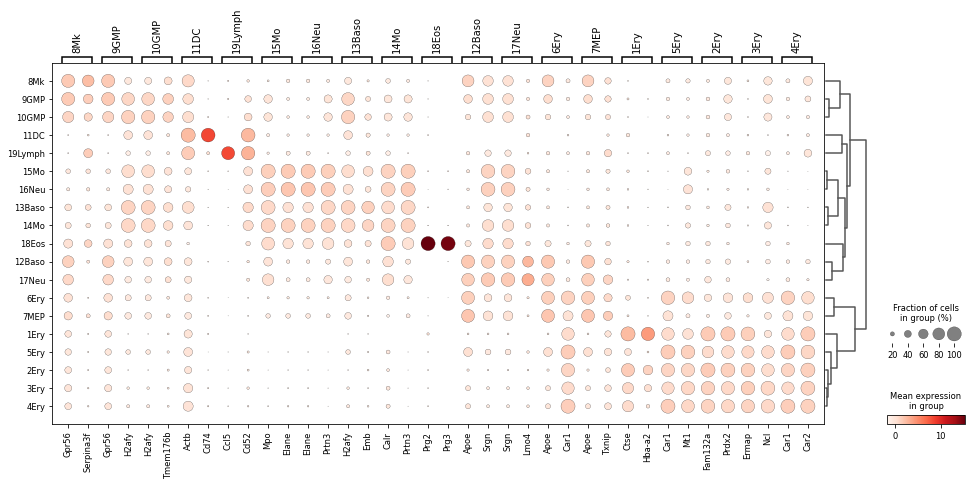

In [20]:
marker_genes(adata, n_genes=2)

### Also, we can look at every pathway found in each cluster

In [15]:
from descartes_rpa.pl import pathways

In [21]:
adata.uns["pathways"].keys()

odict_keys(['7MEP', '15Mo', '3Ery', '4Ery', '2Ery', '17Neu', '14Mo', '13Baso', '8Mk', '9GMP', '10GMP', '16Neu', '5Ery', '1Ery', '6Ery', '19Lymph', '12Baso', '18Eos', '11DC'])

In [22]:
pathways(adata, "18Eos")

,stId,dbId,name,species,llp,entities,reactions,inDisease
0,R-HSA-6798695,6798695,Neutrophil degranulation,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 480, 'found': 1...","{'resource': 'TOTAL', 'total': 10, 'found': 7,...",False
1,R-HSA-168256,168256,Immune System,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",False,"{'resource': 'TOTAL', 'total': 2681, 'found': ...","{'resource': 'TOTAL', 'total': 1623, 'found': ...",False
2,R-HSA-168249,168249,Innate Immune System,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",False,"{'resource': 'TOTAL', 'total': 1334, 'found': ...","{'resource': 'TOTAL', 'total': 710, 'found': 1...",False
3,R-HSA-8941413,8941413,Events associated with phagocytolytic activity...,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 19, 'found': 2,...","{'resource': 'TOTAL', 'total': 14, 'found': 5,...",False
4,R-HSA-381183,381183,ATF6 (ATF6-alpha) activates chaperone genes,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 15, 'found': 2,...","{'resource': 'TOTAL', 'total': 5, 'found': 1, ...",False
5,R-HSA-419408,419408,Lysosphingolipid and LPA receptors,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 19, 'found': 2,...","{'resource': 'TOTAL', 'total': 5, 'found': 1, ...",False
6,R-HSA-381033,381033,ATF6 (ATF6-alpha) activates chaperones,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 17, 'found': 2,...","{'resource': 'TOTAL', 'total': 10, 'found': 1,...",False
7,R-HSA-6803204,6803204,TP53 Regulates Transcription of Genes Involved...,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 33, 'found': 2,...","{'resource': 'TOTAL', 'total': 25, 'found': 2,...",False
8,R-HSA-114608,114608,Platelet degranulation,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 139, 'found': 3...","{'resource': 'TOTAL', 'total': 11, 'found': 3,...",False
9,R-HSA-76005,76005,Response to elevated platelet cytosolic Ca2+,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 146, 'found': 3...","{'resource': 'TOTAL', 'total': 14, 'found': 3,...",False


In [24]:
pathways(adata, "3Ery")

,stId,dbId,name,species,llp,entities,reactions,inDisease
0,R-HSA-5661231,5661231,Metallothioneins bind metals,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 16, 'found': 3,...","{'resource': 'TOTAL', 'total': 27, 'found': 10...",False
1,R-HSA-5660526,5660526,Response to metal ions,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",False,"{'resource': 'TOTAL', 'total': 21, 'found': 3,...","{'resource': 'TOTAL', 'total': 31, 'found': 10...",False
2,R-HSA-9037628,9037628,Rhesus blood group biosynthesis,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 4, 'found': 2, ...","{'resource': 'TOTAL', 'total': 2, 'found': 1, ...",False
3,R-HSA-189445,189445,Metabolism of porphyrins,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",False,"{'resource': 'TOTAL', 'total': 74, 'found': 3,...","{'resource': 'TOTAL', 'total': 42, 'found': 4,...",False
4,R-HSA-210745,210745,Regulation of gene expression in beta cells,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 35, 'found': 2,...","{'resource': 'TOTAL', 'total': 12, 'found': 1,...",False
5,R-HSA-189451,189451,Heme biosynthesis,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 46, 'found': 2,...","{'resource': 'TOTAL', 'total': 20, 'found': 3,...",False
6,R-HSA-9033658,9033658,Blood group systems biosynthesis,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",False,"{'resource': 'TOTAL', 'total': 52, 'found': 2,...","{'resource': 'TOTAL', 'total': 22, 'found': 1,...",False
7,R-HSA-186712,186712,Regulation of beta-cell development,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",False,"{'resource': 'TOTAL', 'total': 67, 'found': 2,...","{'resource': 'TOTAL', 'total': 26, 'found': 1,...",False
8,R-HSA-8936459,8936459,RUNX1 regulates genes involved in megakaryocyt...,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 78, 'found': 2,...","{'resource': 'TOTAL', 'total': 33, 'found': 12...",False
9,R-HSA-163765,163765,ChREBP activates metabolic gene expression,"{'dbId': 48887, 'taxId': '9606', 'name': 'Homo...",True,"{'resource': 'TOTAL', 'total': 9, 'found': 1, ...","{'resource': 'TOTAL', 'total': 6, 'found': 1, ...",False
